# Imports

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
from matplotlib.colors import ListedColormap
import mapclassify

# Create function for drawing a map for an excel file with columns: teryt, region, data

In [113]:
def draw_region_map(df: pd.DataFrame) -> None:
    # Make the region names lowercase
    df.region = df.region.str.lower()

    # Read map of regions
    mapa_woj = gpd.read_file("Wojewodztwa\Województwa.shp")[['JPT_KOD_JE', 'geometry']] 

    # Change the 'teryt' format so it's compatible with the map file (cut to 2 characters) and save it as a string
    df.teryt = df.teryt.apply(lambda x: str(x)[:2] if len(str(x))>6 else '0'+str(x)[0]).astype("object")

    # Merge df with map dataframe and drop NANs
    df_map = pd.merge(mapa_woj, df, how="left", left_on="JPT_KOD_JE", right_on="teryt").dropna()

    # Add coords for annotation
    df_map['coords'] = df_map['geometry'].apply(lambda x: x.representative_point().coords[:])
    df_map['coords'] = [coord[0] for coord in df_map['coords']]

    # Create figure and axes
    fig, ax = plt.subplots(1, figsize=(8,8))
    
    # Draw map
    df_map.plot(column='data', 
             ax=ax, 
             cmap='viridis', 
             linewidth=0.8, 
             edgecolor='gray', 
             scheme='maximum_breaks', 
             legend = False)

    # Turn axes off
    ax.axis('off')

    # Annotate
    for idx, row in df_map.iterrows():
        if row["data"] < 0.3 * max(df_map["data"]):
            annot_color = "white"
        else:
            annot_color = "black"
        text = f"{row['region']}\n{round(row['data'])}"
        plt.annotate(text=text, xy=(row.geometry.centroid.x, row.geometry.centroid.y), 
                    horizontalalignment='center', size=8, color=annot_color)




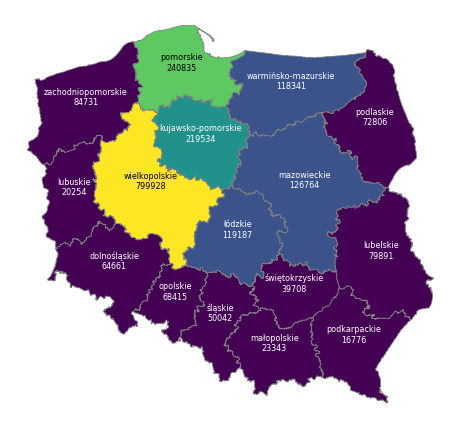

In [114]:
draw_region_map(pd.read_excel("prosiaki.xlsx", sheet_name=0));